## Part 1: Search methods

In [27]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [3]:
import re

l = "color or colour"

pattern = re.compile("colou?r")
pattern.findall(l)

['color', 'colour']

In [5]:
def get_city_info(city_coordination):
    city_location = {}
    for line in city_coordination.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "": continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location

city_info = get_city_info(coordination_source)
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [11]:
import math

def geo_distance(origin,destination):
    lat1,lon1 = origin
    lat2,lon2 = destination
    radius = 6371 # km
    
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = (math.sin(dlat/2)**2 + 
    math.cos(math.radians(lat1)) * math.cos(math.radians(lat2))*
    math.sin(dlon/2)**2)
    c = 2 * math.atan2(math.sqrt(a),math.sqrt(1-a))
    d = radius * c
    
    return d
    
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

get_city_distance("杭州","上海")

153.5185697155768

In [12]:
city_info.keys()

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])

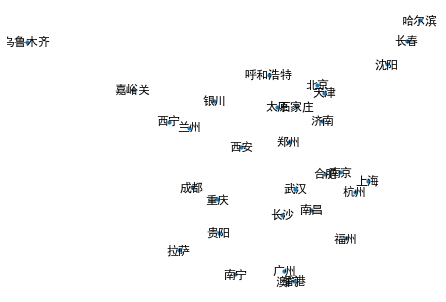

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']

city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))
nx.draw(city_graph,city_info,with_labels=True,node_size=10)

In [17]:
threshold = 700

from collections import defaultdict

def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2: continue
                
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection

cities_connection = build_connection(city_info)
cities_connection

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

In [18]:
def search_1(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
        
        successors = graph[frontier]
        
        for city in successors:
            if city in path: continue
                
            new_path = path + [city]
            
            pathes.append(new_path) # bfs
            # pathes = [new_path] + pathes # dfs
            
            if city == destination:
                return new_path
        
        visited.add(frontier)
 

In [21]:
search_1(cities_connection,"上海","香港")

['上海', '合肥', '香港']

In [22]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in visited: continue
            
        if frontier == destination:
            return path
        
        successors = graph[frontier]
        
        for city in successors:
            if city in path: continue # check loop
            new_path = path+[city]
            pathes.append(new_path)
            
        pathes = search_strategy(pathes)
        visited.add(frontier)

In [23]:
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [24]:
search_2(cities_connection,"北京","上海",search_strategy=lambda x:x)

['北京', '济南', '上海']

In [26]:
search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '天津', '上海']

## Part 2: Machine Learning

In [28]:
from sklearn.datasets import load_boston
import random

dataset = load_boston()

In [29]:
x,y = dataset['data'],dataset['target']
print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [30]:
x[1].shape

(13,)

In [31]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [32]:
dataset['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

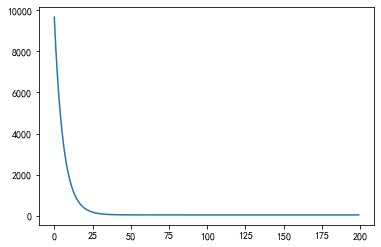

In [43]:
X_rm = x[:,5]

def price(rm,k,b):
    return k * rm + b

def loss(y,y_hat):
    n = len(y)
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/n

def partial_derivative_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y,y_hat):
    n = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)
    return -2/n * gradient

k = random.random() * 200 - 100
b = random.random() * 200 - 100

alpha = 1e-3
n_iter = 200
losses = []

for i in range(n_iter):
    y_hat = [price(r,k,b) for r in X_rm]
    current_loss = loss(y,y_hat)
#     print("iteration {}, loss is {}, parameter k is {}, b is {}".format(i,current_loss,k,b))
    losses.append(current_loss)
    
    k_grad = partial_derivative_k(X_rm,y,y_hat)
    b_grad = partial_derivative_b(y,y_hat)
    
    k = k + (-1 * k_grad) * alpha
    b = b + (-1 * b_grad) * alpha
    
best_k = k
best_b = b

best_y_hat = [price(r,best_k,best_b) for r in X_rm]

plt.plot(losses)


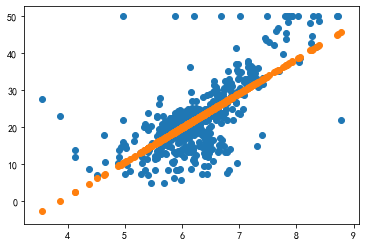

In [44]:
plt.scatter(X_rm,y)
plt.scatter(X_rm,best_y_hat)